# Churn Prediction - Como Antecipar a Evasão de Clientes com Machine Learning

Em mercados competitivos, a retenção do cliente é tão importante quanto a sua conquista. *Churn rate*, ou simplesmente *churn*, representa a taxa de evasão da sua base de clientes. Em serviços como Spotify ou Netflix, ela representaria a taxa de cancelamento de assinaturas.

*Por que isso importa?* Reter clientes custa menos do que consquistá-lo - `Custo de Aquisição de Cliente (CAC)`. Um alto *churn* pode indicar problemas na experiência do cliente, na proposta de valor, ou na concorrência. Ou seja, um alto valor para o *churn rate* é o que não desejamos.

<p align=center>
<img src="https://raw.githubusercontent.com/carlosfab/dsnp2/master/img/churnrate.jpg" width="60%"></p>

Com modelos de machine learning, é possível identificar padrões comportamentais que antecedem o cancelamento. Isso permite que empresas atuem proativamente, oferecendo incentivos, promoções ou mudanças no serviço para evitar perdas.

## Fonte dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na plataforma do Kaggle, e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://www.kaggle.com/datasets/blastchar/telco-customer-churn).

Cada registro representa um cliente, com atributos como:

* Tipo de serviço (Internet, Telefone, Etc).

* Forma de Pagamento.

* Tempo como cliente.

* Indicador de *Churn* (Variável Alvo).

In [2]:
# Importando pacotes
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context="paper", style="white")
sns.color_palette("Spectral", n_colors=5)

# Importando Dados
PATH = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(PATH)

# Conferindo o Dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Análise Exploratória dos Dados

Antes de aplicar qualquer tipo de modelo preditivo, é crucial entender a estrutura e os padrões presentes nos dados. Nesta etapa, exploramos as variáveis, tratamos inconsistências e extraímos insights preliminares que ajudam na modelagem posterior.

In [3]:
print("Dimensões do Dataset")
print("Linhas: \t\t{}".format(df.shape[0]))
print("Colunas: \t\t{}".format(df.shape[1]))

Dimensões do Dataset
Linhas: 		7043
Colunas: 		21


In [4]:
print("Dados Ausentes (total): {}\n".format(df.isnull().sum().values.sum()))
print(df.isnull().sum() / df.shape[0])

Dados Ausentes (total): 0

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64


In [5]:
print("Nome das Features do Dataset: \n {} \n".format(df.columns.values))

Nome das Features do Dataset: 
 ['customerID' 'gender' 'SeniorCitizen' 'Partner' 'Dependents' 'tenure'
 'PhoneService' 'MultipleLines' 'InternetService' 'OnlineSecurity'
 'OnlineBackup' 'DeviceProtection' 'TechSupport' 'StreamingTV'
 'StreamingMovies' 'Contract' 'PaperlessBilling' 'PaymentMethod'
 'MonthlyCharges' 'TotalCharges' 'Churn'] 



In [6]:
print("Valores únicos por coluna: \n{}".format(df.nunique()))

Valores únicos por coluna: 
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [7]:
print("Tipo de variáveis de cada coluna: \n{}".format(df.dtypes))

Tipo de variáveis de cada coluna: 
customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [8]:
df.loc[0]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

**Observações Iniciais** 

*   A coluna `customerID` é apenas um identificador único, sem valor preditivo e será removida.

*   A variável alvo é `Churn`, indicando se o cliente deixou ou não a operadora

*   A coluna `TotalCharges` deveria ser numérica, mas encontra-se como object - será convertida para float. 

Após essa conversão, realizamos uma nova verificação de dados ausentes, que podem ter sido mascarados pelo tipo incorreto em que se encontra.

*   Muitas colunas apresentam dados binários (`Yes/No`), que precisam ser transformados em valores numéricos ao longo do pré-processamento.

### Limpeza e Pré-processamento Inicial dos Dados

In [9]:
# Criando cópia do Dataframe
df_clean = df.copy()

# Remover a coluna "costumerID"
df_clean.drop("customerID", axis=1, inplace=True)

# Converter strings para float
df_clean["TotalCharges"] = pd.to_numeric(df_clean["TotalCharges"], errors="coerce")

In [10]:
# Verificando valores ausentes
ausentes = df_clean["TotalCharges"].isnull().sum()

print("Valores ausentes em TotalCharges: \t{ausentes}")

Valores ausentes em TotalCharges: 	{ausentes}


Durante a conversão da coluna `TotalCharges` de string para float, identificamos valores ausentes. 

Decidimos substituí-los pela mediana, uma estratégia robusta contra outliers.

In [11]:
# Substituindo valores ausentes pela mediana
df_clean["TotalCharges"] = df_clean["TotalCharges"].fillna(df_clean["TotalCharges"].median())

In [12]:
print("Valores ausentes em TotalCharges: \t{}".format(df_clean["TotalCharges"].isnull().sum()))

Valores ausentes em TotalCharges: 	0


### Continuando a Análise Exploratória

Embora o Dataset seja composto majoritariamente por variáveis categóricas, também utilizamos o método `describe()` para uma análise estatística das variáveis numéricas. Isso nos ajuda a identificar: 

* Possíveis `outliers`.

* Distribuições enviesadas.

* Necessidade de normalização ou padronização.

In [13]:
df_clean.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


Através do resultado do `describe()`, notamos que o crescimento dos resultados apresentam uma amplitude normal, o que pode indicar que os dados não apresentam outliers.

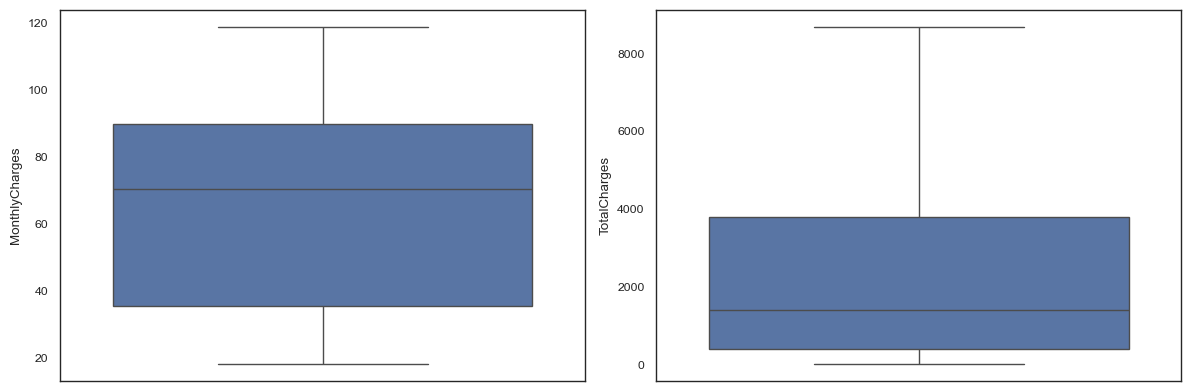

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.boxplot(df_clean["MonthlyCharges"], ax=ax[0])
sns.boxplot(df_clean["TotalCharges"], ax=ax[1])
plt.tight_layout()

Analisando o `boxplot` para as colunas `MonthlyCharge` e `TotalCharges`, confirma-se que não há presença de outliers nos dados.

--- 

A variável `SeniorCitizen` é uma variável binária, que indica se o cliente é Idoso ou não, vemos que 16% dos clientes são idoso.

In [15]:
print("O total de Idosos assinantes é de {}.".format(round(df_clean["SeniorCitizen"].value_counts(normalize=False))[1]))
print("Referente à {:.2f}% do total de clientes.".format((df_clean["SeniorCitizen"].value_counts(normalize=True)*100)[1]))

O total de Idosos assinantes é de 1142.
Referente à 16.21% do total de clientes.


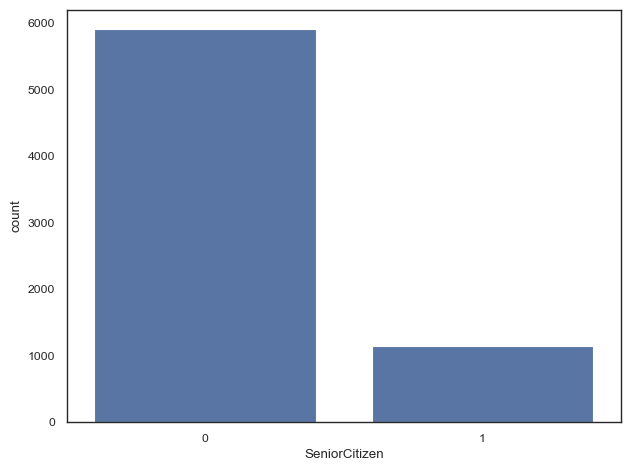

In [16]:
sns.countplot(data=df_clean, x="SeniorCitizen")
plt.tight_layout()

A variável `tenure` indica o tempo de permanência de um cliente assinante, pode-se dizer que é um indicativo de fidelidade. Apensar de não haver nenhum indicativo da métrica, vamos assumir que a unidade de tempo utilizada é `Mês`.

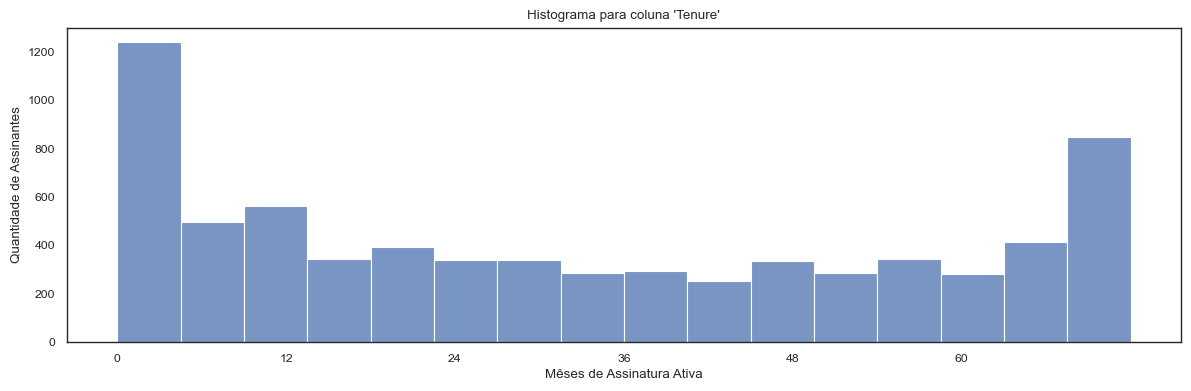

In [17]:
fig, ax = plt.subplots(figsize=(12,4))
sns.histplot(df_clean["tenure"])
plt.xticks(range(0,70,12))
plt.xlabel("Mêses de Assinatura Ativa")
plt.ylabel("Quantidade de Assinantes")
plt.title("Histograma para coluna 'Tenure'")
plt.tight_layout()

Através do histograma da variável `tenure`, observamos que o primeiro ano de assinatura é crucial para a retenção dos cliente, após esse período a tendência é de que permaneçam com a assinatura ativa. 

### Analisando Variáveis Categóricas

Grande parte das variáveis presentes neste dataset são categóricas, representadas como textos. Isso inclui colunas como `gender`, `InternetService`, `Contract`, `PaymentMethod`, entre outras.

#### Objetivo 

Entender a distribuição e possíveis correlações com o `Churn`. Por exemplo, cliente com contratos mensais ou com serviços de Internet mais instáveis podem ter maior probabilidade de evasão.

Lidando com variáveis categóricas, é importante conferir os valores únicos, pois permite identificar como os dados são constituídos, identificar labels diferentes porém com o mesmo significado.

In [18]:
np.unique(df_clean.select_dtypes("object").values)

array(['Bank transfer (automatic)', 'Credit card (automatic)', 'DSL',
       'Electronic check', 'Female', 'Fiber optic', 'Mailed check',
       'Male', 'Month-to-month', 'No', 'No internet service',
       'No phone service', 'One year', 'Two year', 'Yes'], dtype=object)

In [19]:
df_clean.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

O gráfico abaixo mostra as variáveis categóricas com maior separação entre o resultado de `Churn`. De acordo com cada uma dessas variáveis, os clientes que apresentam os maiores índices de Churn são:

* `Contract`: Contratos de renovação mensal.

* `InternetService`: Clientes com fibra óptica.

* `PaymentMethod`: Clientes com pagamento do tipo "Cheque Eletrônico".

* `TechSupport`: Clientes sem suporte técnico.

* `OnlineSecurity`: Clientes sem segurança online.

* `DeviceProtection`: Clientes que não optaram por algum tipo de proteção (Antivírus)

* `StreamingTV`: Pequena diferença, mas a maioria dos cancelamentos são de clientes que não utilizam TV por Streaming.

* `StreamingMovies`: Assim como o anterior, a maioria dos cancelamentos são de clientes que não assistem Filmes por Streaming.

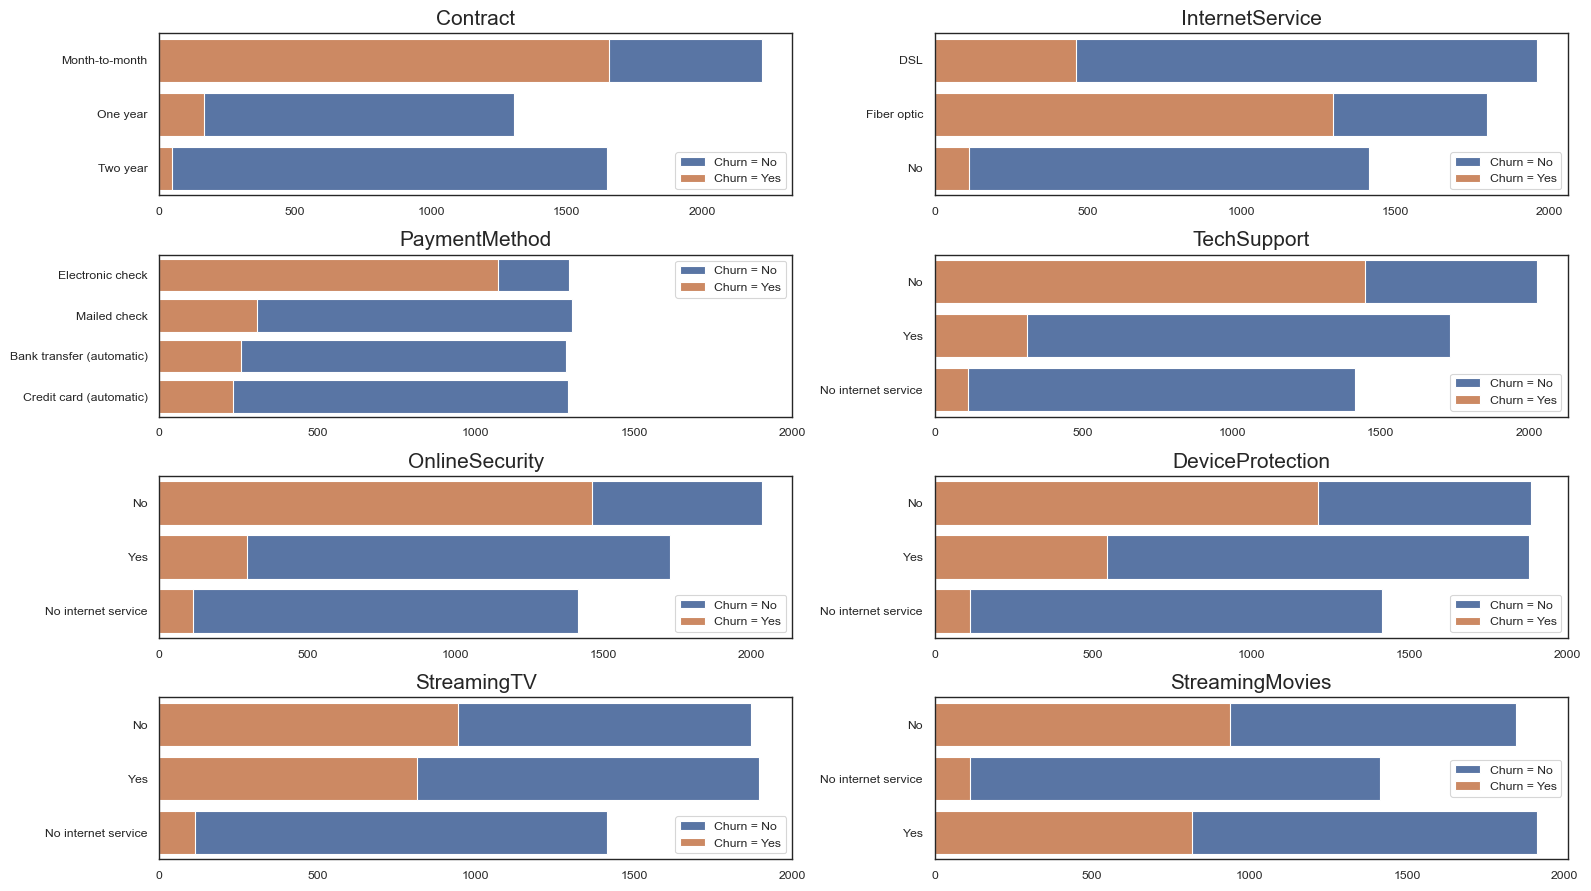

In [20]:
# Criando plot com as variáveis categóricas com maior separação entre a classe Churn

df_class_0 = df_clean[df_clean.Churn == "No"]
df_class_1 = df_clean[df_clean.Churn == "Yes"]

fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,9))
fig.subplots_adjust(hspace=3, wspace=3)
sns.color_palette("muted")

# Variáveis mais informativas
selected_cols = [
    "Contract", "InternetService", "PaymentMethod",
    "TechSupport", "OnlineSecurity", "DeviceProtection",
    "StreamingTV", "StreamingMovies"
]

indx = 0
for col in selected_cols:
    indx += 1
    plt.subplot(4, 2, indx)
    sns.countplot(df_class_0[col], label="Churn = No", ) 
    sns.countplot(df_class_1[col], label="Churn = Yes", ) 
    plt.title(col, fontsize=15)
    plt.xlabel("")
    plt.ylabel("")
    plt.legend()
    plt.xticks(range(0,2001,500))

plt.tight_layout()

## Preparação Final para Modelagem


Agora vamos realizar um pré-processamento dos dados para construir a base do nosso modelo de machine learning.

Aqui vamos transformar as features, todas aquelas que contém dois valores únicos, serão transformados para 0 ou 1, utilizando o método `LabelEncoder`. Nessa transformação está inclusa a variável alvo, `Churn`, que apresenta resultados `Yes` ou `No`. As variáveis categóricas serão transformadas em variáveis `dummy`, para facilitar a utilização em diferentes modelos.

In [21]:
# Pré processamento das features
binary_var = df_clean.nunique()[df_clean.nunique() == 2].keys().tolist()
num_var = [col for col in df_clean.select_dtypes(["int", "float"]).columns.tolist() if col not in binary_var]
cat_var = [col for col in df_clean.columns.tolist() if col not in binary_var + num_var]

In [22]:
from sklearn.preprocessing import LabelEncoder

# Criando cópia do dataset
df_prep = df_clean.copy()

# Aplicando o Label Encoding para as features binarias
le = LabelEncoder()
for i in binary_var:
    df_prep[i] = le.fit_transform(df_prep[i])
    
# Encoding para as colunas categóricas
df_prep = pd.get_dummies(df_prep, columns=cat_var)

df_prep.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,1,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,1,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,1,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,0,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


## Modelagem Preditiva

Após a preparação dos dados, iniciamos a fase de modelagem, com o objetivo de prever o `Churn` dos clientes. Foram testados diferentes algoritmos supervisionados, avaliando desempenho e interpretabilidade e viabilidade de produção.

**Algoritmos utilizados**

* `Logistic Regression`
* `SGDClassifier`
* `Random Forest`
* `Support Vector Machine (SVM)`
* `XGBClassifier`
* `LGBMClassifier`
* `Decision Tree`

**Validação**

Utilizamos validação cruzada estratificada (k-fold) para garantir a generalização e preservar proporção de churn.

Métricas principais:

* `Accuracy` -> Acurácia Geral
* `Recall` -> Capacidade de identificar um cliente churn
* `Precision` -> Relevância dos churns previstos
* `F1-score` -> Balanceamento entre Precisão e Recall
* `ROC AUC` -> Capacidade Discriminativa Global


In [56]:
# importando pacotes
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, auc
from imblearn.over_sampling import SMOTENC
from imblearn.pipeline import Pipeline 
from imblearn.pipeline import Pipeline as ImbPipeline
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

Agora que os dados estão devidamente limpos e tratados, vamos dar início à construção dos modelos de machine learning. 

Vamos iniciar separando os dados entre, `feature matrix`, `target vector` e então separar a base entre dados de treino e dados de teste.

In [64]:
# separar as features
X = df_prep.drop("Churn", axis=1)
y = df_prep["Churn"]

# Dividir entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Usaremos o método de `cross-validation` para estimar o erro dos modelos. Para facilitar a construção do código, abaixo temos uma função `validar_modelo` para que possamos executar diferentes modelos de machine learning de forma mais rápida.

A métrica utilizada para avaliação de cada modelo será `recall`.

In [77]:
def validar_modelo(X, y, clf, quite=False):
    """
    Realiza cross-validation com os dados de treino para determinado modelo.

    # Args:
        X : Dataframe com as variáveis independentes.
        y : Series com a variável alvo.
        clf : Modelo classificador do Scikit-learn.
        quite : bool, indica se a função deve imprimir os resultados ou não
        
    # Returns
        float, média dos scores da cross-validation
    """
    
    # Identificando colunas categóricas
    categorical_features = [i for i, col in enumerate(X.columns) if X[col].dtype == "bool"]
    
    pipeline = ImbPipeline([
        ("smote", SMOTENC(categorical_features=categorical_features, random_state=42)),
        ("scaler", StandardScaler()),
        ("clf", clf)
    ])
    
    scores = cross_val_score(pipeline, X, y, scoring="recall", cv=StratifiedKFold(n_splits=10, shuffle=True, random_state=42))
    
    if quite == False:
        print("Recall: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std()))
        
    return scores.mean()

Para servir de modelo de base, vamos utilizar o modelo `Random Forest`, com os parâmetros `default`. 

In [78]:
rf = RandomForestClassifier(random_state=42)
score_baseline = validar_modelo(X_train, y_train, rf)

Recall: 0.58 (+/- 0.04)


Agora temos um resultado base, adiquirido através da aplicação "pura" do modelo, sem nenhum tipo de tuning. Vamos então fazer o balanceamento dos dados e conferir o nível de impacto nos resultados.

Para balanceamento dos dados, vamos utilizar o método SMOTENC por ser o mais adequado para lidar com variáveis mistas: numéricas, categóricas.

Não será feita a padronização dos dados, por conta das diversas variáveis com valores booleanos, como resultam apenas 0 e 1, a normalização transformaria os resultados em frações.


In [ ]:
# Instanciar modelos
rf = RandomForestClassifier(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
sgdc = SGDClassifier(random_state=42)
svc = SVC(random_state=42)
lr = LogisticRegression(random_state=42)
xgb = XGBClassifier(random_state=42)
lgbm = LGBMClassifier(random_state=42)

# Criando listas vazias para armazenar os resultados
model = []
recall = []

# avaliar o desempenho de todos os modelos

for clf in (rf, dt, sgdc, svc, lr, xgb, lgbm):
    model.append(clf.__class__.__name__)
    recall.append(validar_modelo(X_train, y_train, clf, quite=True))


In [81]:
# Transformar os resultados em um dataframe 
resultados = pd.DataFrame(data=recall, index=model)
resultados

,0
RandomForestClassifier,0.584514
DecisionTreeClassifier,0.522039
SGDClassifier,0.660948
SVC,0.624741
LogisticRegression,0.669481
XGBClassifier,0.572182
LGBMClassifier,0.601509


Após o teste inicial, identificamos os seguintes modelos com melhores resultados:

* LogisticRegression
* SGDClassifier
* SVC (SupportVectorClassifier)

--- 

**Analisando Tecnicamente**


*LogisticRegression & SGDClassifier:*   

* Ambos são modelos lineares.

* A SGDClassifier é essencialmente uma versão otimizada da regressão logística (usa gradiente estocástico), mas pode suportar outras funções de perda (hinge, log, etc.).

* Alta correlação entre eles - ótimo para baseline, mas pouca diversidade estrutural.

*SVC:*

* Modelo baseado em margens, forte para problemas não-lineares quando usado com kernels como RBF.

* Pode dar mais diversidade comparado a modelos lineares, mas geralmente mais pesado computacionalmente e menos interpretável.

*LGBMClassifier:*

* Modelo de boosting, baseado em árvores → captura não linearidades e interações complexas.

* Muito diferente dos modelos lineares, ótimo para churn, especialmente quando bem ajustado.

*RandomForestClassifier:*

* Também árvore, mas bagging em vez de boosting.

* Teoricamente, menos flexível que LGBM, mas complementar.


*XGBClassifier:* 

* Similar ao LGBM, mas ligeiras diferenças em otimização.

--- 

**Diversidade de modelos: por que é importante?**

* Combinar modelos muito semelhantes pode limitar ganhos.

* Modelos com naturezas diferentes → maior chance de capturar padrões complementares.

Sendo assim, vamos tomar uma decisão estratégica na hora de selecionar os modelos para a próxima etapa - Otimização de Hiperparâmetros

Os modelos de escolha serão:

* *LogisticRegression*
    * Melhor Resultado
    * Simples
    * Rápido

* *SVC:*
    * O SGDClassifier é muito similar à LogisticRegression, e sua vantagem é performance em datasets grandes e velocidade.
    * O SVC traz uma abordagem completamente diferente: capacidade natural de capturar não-linearidades complexas, o que enriquece muito a diversidade do seu portfólio de modelos.

* *LGBMClassifier*
    * Apesar de não ter o melhor recall, modelo robusto para otimização. Boa margem de crescimento com o tuning.




### Otimização de Hiperparâmetros

#### GridSearchCV ou RandomizedSearchCV ?

**GridSearchCV**

* Ideal quando:

    * O espaço de busca é pequeno e bem definido (ex: 2-3 parâmetros com poucos valores cada).

    * Você quer garantir que TODAS as combinações sejam testadas.

    * Tempo/recursos não são problema.

* Limitação:

    * Cresce exponencialmente com mais parâmetros e combinações (combinatorial explosion).


**RandomizedSearchCV**

* Ideal quando:

    * O espaço de busca é amplo ou contínuo (ex: C entre 0.001 e 1000).

    * Nem todos os hiperparâmetros têm o mesmo peso de impacto (ex: penalty importa mais que max_iter).

    * Você quer rapidamente explorar o espaço e encontrar boas soluções com menos custo computacional.

    * Dados com ruído (como churn) → não há necessidade de testar exaustivamente tudo, já que pequenas variações nos hiperparâmetros não fazem tanta diferença.

Dessa forma, utilizaremos o RandomizedSearchCV para otimização dos hiperparâmetros

#### Logistic Regression

Parâmetros importantes para LogisticRegression:

* `C`	
    * Força da regularização (inverso da penalização L2 ou L1)

* `penalty`	
    * Tipo de regularização (l1, l2, elasticnet, none)

* `solver`
    *	Algoritmo para otimizar (liblinear, saga, lbfgs)

* `max_iter`
    *  	Número máximo de iterações

* `class_weight`
    *	Lida com desbalanceamento (balanced ou None)

In [87]:
# Identificar colunas categóricas
categorical_features = [i for i, col in enumerate(X.columns) if X[col].dtype == "bool"]

# Pipeline com SMOTENC + Scaler + LogisticRegression
pipeline = ImbPipeline(steps=[
    ("smote", SMOTENC(categorical_features=categorical_features, random_state=42)),
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(solver="saga", max_iter=5000, random_state=42))
])

# Parâmetros
param_dist = {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': uniform(0.001, 10),
        'clf__class_weight': [None, 'balanced']
    }


# Cross-Validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# RandomizedSearchCV
search = RandomizedSearchCV(
    estimator=pipeline,
    param_distributions=param_dist,
    n_iter=50,
    scoring="recall",
    cv=kfold,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

# Treinando modelos
search.fit(X_train, y_train)

# Imprimindo resultados
print("Melhores hiperparâmetros: ", search.best_params_)
print("Melhor recall (Validação Cruzada): {:.4f}".format(search.best_score_))

Fitting 10 folds for each of 50 candidates, totalling 500 fits
Melhores hiperparâmetros:  {'clf__C': np.float64(0.2551912674409519), 'clf__class_weight': None, 'clf__penalty': 'l1'}
Melhor recall (Validação Cruzada): 0.6733


1️⃣ penalty = l1:

O modelo prefere regularização L1, que zera coeficientes menos relevantes, ajudando na seleção automática de variáveis.

Pode simplificar a interpretação: algumas variáveis terão coeficiente 0.

2️⃣ C ≈ 0.25:

Um valor moderado de regularização (inverso de penalidade):

👉 Mais baixo → mais forte a regularização.

👉 Mais alto → menos penalização.

Aqui o modelo buscou um equilíbrio entre underfitting e overfitting.

3️⃣ class_weight = None:

SMOTENC já balanceou as classes, então o class_weight='balanced' não agregou valor extra, e o modelo foi melhor sem ele.

4️⃣ Recall CV (0.6733):

Ótima consistência: muito próximo dos valores anteriores (~0.66–0.67) que já tínhamos visto.

Isso mostra que otimizar não trouxe salto gigantesco, mas refinou e estabilizou.



              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1539
           1       0.59      0.72      0.65       574

    accuracy                           0.79      2113
   macro avg       0.74      0.76      0.75      2113
weighted avg       0.80      0.79      0.79      2113

AUC: 0.7649


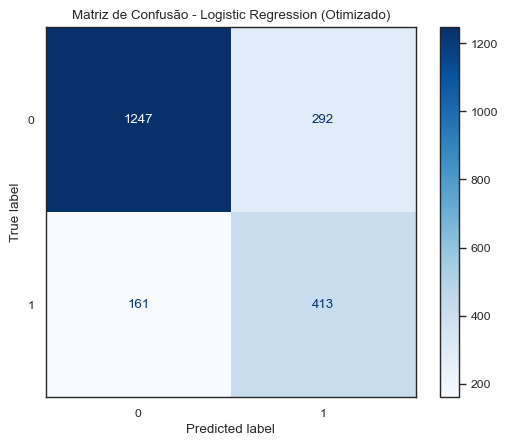

In [91]:
# Melhor modelo
best_model = search.best_estimator_

# Ajuste final no conjunto de treino
best_model.fit(X_train, y_train)

# Previsão no conjunto de testes
y_pred = best_model.predict(X_test)

# Avaliação dos resultados
print(classification_report(y_test, y_pred))
print("AUC: {:.4f}".format(roc_auc_score(y_test, y_pred)))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Matriz de Confusão - Logistic Regression (Otimizado)")
plt.grid(False)
plt.show()

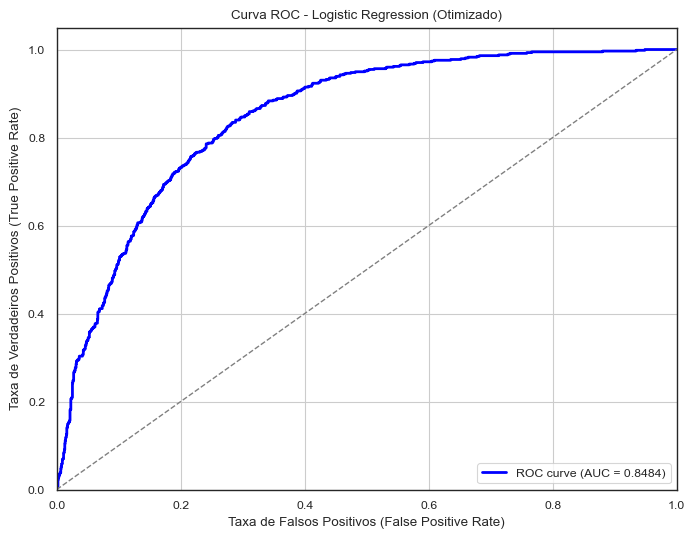

In [93]:
# Gerar as probabilidades para a classe positiva (churn)
y_pred_prob = best_model.predict_proba(X_test)[:, 1]

# Calcular pontos da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos (False Positive Rate)')
plt.ylabel('Taxa de Verdadeiros Positivos (True Positive Rate)')
plt.title('Curva ROC - Logistic Regression (Otimizado)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

🧠 Interpretação técnica:
1️⃣ Recall (classe 1): 0.72

Muito próximo do recall de validação cruzada (~0.67), o que mostra boa generalização.

🟢 Acertou 413 de 574 churns (~72%) ➔ sólido para churn prediction.

2️⃣ Precisão (classe 1): 0.59

1 falso positivo para cada 1.4 verdadeiro positivo.

⚠️ Normal para churn: melhor pegar mais churns (mesmo errando alguns) do que deixar churn passar.

3️⃣ Classe 0 (não churn):

Muito forte: 1247 de 1539 acertos (81%).

4️⃣ AUC: 0.7649

Muito estável e bom. Em churn datasets, AUC entre 0.75–0.8 já indica um modelo robusto.